In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
from sklearn.datasets import load_iris

In [46]:
df=load_iris()

In [47]:
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [48]:
dataset=pd.DataFrame(df.data)

In [49]:
dataset

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [50]:
dataset.columns=df.feature_names

In [51]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [52]:
from sklearn.cluster import KMeans

In [53]:
wcss=[]

for i in range(1,15):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit_predict(dataset)
    wcss.append(km.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


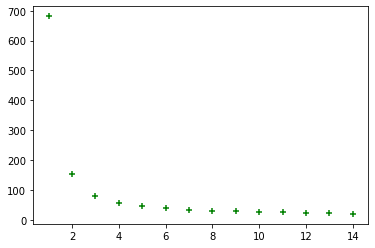

In [54]:
plt.scatter(range(1,15),wcss,marker="+",color="green")

In [55]:
km=KMeans(n_clusters=3,init='k-means++')
y_predict=km.fit_predict(dataset)

In [56]:
km.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [57]:
dataset["cluster"]=y_predict

In [58]:
dataset=dataset.drop(["sepal length (cm)","sepal width (cm)"],axis=1)

In [59]:
dff=dataset

In [60]:
dff

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,2
147,5.2,2.0,1
148,5.4,2.3,1


In [61]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale.fit(dff[["petal length (cm)"]])
dff["petal length (cm)"]=scale.transform(dff[["petal length (cm)"]])

scale.fit(dff[["petal width (cm)"]])
dff["petal width (cm)"]=scale.transform(dff[["petal width (cm)"]])


In [62]:
dff

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,2
147,0.711864,0.791667,1
148,0.745763,0.916667,1


ValueError: s must be a scalar, or the same size as x and y

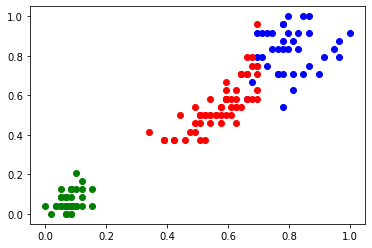

In [65]:
dff1=dff[dff["cluster"]==0]
dff2=dff[dff["cluster"]==1]
dff3=dff[dff["cluster"]==2]

plt.scatter(dff1["petal length (cm)"],dff1["petal width (cm)"],s=None,color="green")
plt.scatter(dff2["petal length (cm)"],dff2["petal width (cm)"],s=None,color="blue")
plt.scatter(dff3["petal length (cm)"],dff3["petal width (cm)"],s=None,color="red")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:2],km.cluster_centers_[:3],marker="*")